In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data_2006.csv')

In [33]:
df.head(100)

,State Abbreviation,FIPS,County,State,No. of cases,Avg Daily Max Air Temperature (F),Avg Daily Min Air Temperature (F),Avg Daily Max Heat Index (F),Mortality,total_mean_smoking,...,Children in poverty raw value,Income inequality raw value,Inadequate social support raw value,Single-parent households raw value,Violent crime raw value,Homicides raw value,Air pollution-particulate matter days raw value,Air pollution-ozone days raw value,Access to healthy foods raw value,Liquor store density raw value
0,AL,1001.0,AUTAUGA,Alabama,1.0,75.82,55.51,93.63,0.40,26.26,...,0.1435,40.7,0.27205,0.086621,256.393506,12.50,3.50,0.0,0.291500,4.203629
1,AL,1003.0,BALDWIN,Alabama,4.0,77.74,61.17,93.73,0.27,24.59,...,0.1520,44.5,0.19215,0.086006,183.161617,12.50,2.50,8.5,0.486538,5.386369
2,AL,1005.0,BARBOUR,Alabama,4.0,76.90,57.08,93.23,0.59,27.71,...,0.3300,47.4,0.11645,0.143552,68.102655,12.50,7.00,0.0,0.575000,5.533333
3,AL,1007.0,BIBB,Alabama,0.0,75.12,54.68,93.38,0.42,29.37,...,0.2460,39.8,0.24370,0.051258,145.990394,12.50,2.50,0.5,0.678500,2.734291
4,AL,1009.0,BLOUNT,Alabama,0.0,72.66,53.81,91.72,0.41,29.30,...,0.1790,41.1,0.11830,0.071206,69.791427,12.50,6.00,1.0,0.619214,0.000000
5,AL,1011.0,BULLOCK,Alabama,1.0,76.41,56.02,93.15,0.81,28.35,...,0.3835,47.2,0.17820,0.175039,240.413068,12.50,10.00,0.0,0.291500,4.965463
6,AL,1013.0,BUTLER,Alabama,0.0,76.80,56.56,93.34,0.60,27.30,...,0.3255,43.9,0.17820,0.098212,219.338492,12.50,4.50,0.0,0.450000,2.747366
7,AL,1015.0,CALHOUN,Alabama,5.0,73.11,53.91,91.47,0.60,28.61,...,0.2380,45.5,0.22110,0.103289,565.015656,12.50,6.50,0.0,0.625000,2.310548
8,AL,1017.0,CHAMBERS,Alabama,1.0,74.01,55.24,91.52,0.55,29.32,...,0.2570,40.2,0.27570,0.094843,265.981930,12.50,5.50,1.0,0.875000,8.930775
9,AL,1019.0,CHEROKEE,Alabama,0.0,72.23,54.02,91.29,0.42,28.06,...,0.2780,44.4,0.22020,0.088663,41.527614,12.50,6.50,0.0,0.450000,4.203865


In [3]:
cases = pd.read_csv('covid_confirmed.csv')
death = pd.read_csv('covid_deaths.csv')

In [4]:
cases = cases[~cases['County Name'].str.contains("Statewide Unallocated")]
death = death[~death['County Name'].str.contains("Statewide Unallocated")]

In [5]:
cases = cases.iloc[:,4:]
death = death.iloc[:,4:]
cases.shape

(3144, 149)

In [260]:
type(cases)

list

In [6]:
dfs = df.iloc[:,5:]
dfs.shape

(3144, 51)

In [73]:
dfs['confirmed'] = cases.iloc[:,0].values
dfs['date'] = 0 
dfs['death'] = death.iloc[:,0].values
dfs.isna().sum()

Avg Daily Max Air Temperature (F)                                                                   2
Avg Daily Min Air Temperature (F)                                                                   2
Avg Daily Max Heat Index (F)                                                                        2
Mortality                                                                                           2
total_mean_smoking                                                                                  4
Percentage_diabetes                                                                                 2
POPESTIMATE                                                                                         3
TB_mortality                                                                                        2
LifeExpectancy                                                                                      2
Employed                                                                          

In [285]:
dfs = pd.DataFrame(dfs)
cases = pd.DataFrame(cases)
new = pd.concat([dfs, cases.reindex(dfs.index)], axis=1)
new.columns[51]

'1/22/20'

In [108]:
final = pd.DataFrame()
for i in range(1,149):
    dfs = df.iloc[:,5:]
    dfs['FIPS'] = df.iloc[:,1].values
    dfs['confirmed'] = cases.iloc[:,i].values
    dfs['date'] = i-1 
    dfs['death'] = death.iloc[:,i-1].values
    dfs['prev'] = cases.iloc[:,i-1].values
    dfs.fillna(df.mean())
    final = final.append(dfs, ignore_index = False)
final.to_csv('final.csv', index = False)

In [7]:
import matplotlib.pyplot as plt
import tensorflow as tf
from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

%matplotlib inline
#tf.logging.set_verbosity(tf.logging.ERROR)

print('Libraries imported.')

Libraries imported.


In [76]:
final = pd.read_csv('final.csv')
final.tail()

,Avg Daily Max Air Temperature (F),Avg Daily Min Air Temperature (F),Avg Daily Max Heat Index (F),Mortality,total_mean_smoking,Percentage_diabetes,POPESTIMATE,TB_mortality,LifeExpectancy,Employed,...,Homicides raw value,Air pollution-particulate matter days raw value,Air pollution-ozone days raw value,Access to healthy foods raw value,Liquor store density raw value,FIPS,confirmed,date,death,prev
465303,52.42,35.38,81.85,0.15,24.28,7.5,39749.0,0.73,76.91,22719.0,...,18.95,41.5,23497.5,12.533333,20.220641,56037.0,44,147,0,43
465304,43.42,26.62,80.25,0.13,26.94,6.8,8270.0,0.59,82.20,13577.0,...,13.15,14.5,23497.5,6.375000,16.139261,56039.0,108,147,1,107
465305,49.93,32.83,81.43,0.17,24.69,6.6,19709.0,0.69,77.36,10620.0,...,18.40,21.0,23497.5,10.842857,21.471452,56041.0,116,147,0,104
465306,54.50,38.79,84.24,0.15,NaN,6.4,7979.0,0.65,77.82,4005.0,...,16.80,7.5,27371.0,7.900000,24.551346,56043.0,39,147,3,39
465307,59.70,40.90,85.91,0.15,NaN,7.3,6717.0,0.71,77.57,2947.0,...,16.10,6.0,23036.5,7.000000,23.508725,56045.0,1,147,0,1


In [77]:
final = final.fillna(df.mean())

In [287]:
new = new.fillna(new.mean())

In [10]:
column_names = final.columns[:]

In [82]:
final.mean()

Avg Daily Max Air Temperature (F)                                                                       66.521935
Avg Daily Min Air Temperature (F)                                                                       47.991630
Avg Daily Max Heat Index (F)                                                                            90.220083
Mortality                                                                                                0.316645
total_mean_smoking                                                                                      25.796344
Percentage_diabetes                                                                                      8.542603
POPESTIMATE                                                                                         100020.787329
TB_mortality                                                                                             2.231060
LifeExpectancy                                                                          

In [288]:
new_norm = (new - new.mean()) / new.std()
new_norm.tail()

,Avg Daily Max Air Temperature (F),Avg Daily Min Air Temperature (F),Avg Daily Max Heat Index (F),Mortality,total_mean_smoking,Percentage_diabetes,POPESTIMATE,TB_mortality,LifeExpectancy,Employed,...,06-09-2020,06-10-2020,06-11-2020,06-12-2020,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20
3139,-1.797897e+00,-2.005032e+00,-2.621667e+00,-0.561216,-2.753454e-01,-0.981172,-2.654106e-01,-0.588917,0.342343,-2.401676e-01,...,-0.182686,-0.182381,-0.182285,-0.182571,-0.183294,-0.183589,-0.184197,-0.184426,-0.184595,-0.185588
3140,-1.302693e+00,-1.216859e+00,-1.783577e+00,-0.637756,8.841945e-16,-1.082188,-3.041754e-01,-0.604203,0.559609,-2.854122e-01,...,-0.175804,-0.176730,-0.177265,-0.178466,-0.179219,-0.180115,-0.180739,-0.181850,-0.182607,-0.183614
3141,-7.392226e-01,-9.378242e-01,-1.285494e+00,-0.637756,8.841945e-16,-0.627615,-3.083460e-01,-0.581274,0.441530,-2.926486e-01,...,-0.184481,-0.185355,-0.185828,-0.186970,-0.187951,-0.188221,-0.189095,-0.189864,-0.190556,-0.191792
3142,1.539883e-15,-9.396488e-16,-4.238428e-15,0.000000,8.841945e-16,0.000000,-4.809049e-17,0.000000,0.000000,-4.976536e-17,...,-0.101905,-0.101777,-0.099608,-0.097824,-0.095678,-0.095296,-0.094872,-0.095983,-0.094885,-0.093367
3143,1.539883e-15,-9.396488e-16,-4.238428e-15,0.000000,8.841945e-16,0.000000,-4.809049e-17,0.000000,0.000000,-4.976536e-17,...,-0.133320,-0.134197,-0.135336,-0.135946,-0.136721,-0.136982,-0.138093,-0.137772,-0.138888,-0.140465


In [83]:
X = final.drop(['confirmed'],axis = 1)
y = final['confirmed']

In [290]:
X = new_norm.drop(['6/18/20'],axis = 1)
y = new_norm['6/18/20']

In [84]:
y_mean = y.mean()
y_std = y.std()
def convert_label_value(pred):
    return (pred * y_std + y_mean)
print(y_std,y_mean)

1862.2041727777073 215.81766056031705


In [85]:
convert_label_value(-0.094951)

38.99951215090098

In [86]:
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

In [15]:
print(X.shape,y.shape)

(465308, 55) (465308,)


In [87]:
X_arr = X.values
Y_arr = y.values

print('X_arr shape: ', X_arr.shape)
print('Y_arr shape: ', Y_arr.shape)

X_arr shape:  (465308, 55)
Y_arr shape:  (465308,)


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, Y_arr, test_size = 0.05, shuffle = True, random_state=0)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (442042, 55)
y_train shape:  (442042,)
X_test shape:  (23266, 55)
y_test shape:  (23266,)


In [94]:
def get_model_1():
    
    model = Sequential([
        Dense(30, input_shape = (X_train.shape[1],), activation = 'relu'),
        Dense(1, activation = 'relu')
    ])
    
    opt = tf.keras.optimizers.Adam(lr=0.00001)

    model.compile(
        loss='mean_squared_error',
        optimizer=opt
    )
    
    return model

model = get_model_1()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                1680      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 1,711
Trainable params: 1,711
Non-trainable params: 0
_________________________________________________________________


In [95]:
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)

model = get_model_1()

preds_on_untrained = model.predict(X_test)

history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 20,
    #callbacks = [early_stopping]
)

Epoch 1/20
13814/13814 [==============================] - 17s 1ms/step - loss: 0.7923 - val_loss: 0.4131
Epoch 2/20
13814/13814 [==============================] - 15s 1ms/step - loss: 0.3711 - val_loss: 0.1968
Epoch 3/20
13814/13814 [==============================] - 15s 1ms/step - loss: 0.1589 - val_loss: 0.0736
Epoch 4/20
13814/13814 [==============================] - 15s 1ms/step - loss: 0.0561 - val_loss: 0.0367
Epoch 5/20
13814/13814 [==============================] - 15s 1ms/step - loss: 0.0332 - val_loss: 0.0298
Epoch 6/20
13814/13814 [==============================] - 15s 1ms/step - loss: 0.0270 - val_loss: 0.0253
Epoch 7/20
13814/13814 [==============================] - 15s 1ms/step - loss: 0.0227 - val_loss: 0.0215
Epoch 8/20
13814/13814 [==============================] - 15s 1ms/step - loss: 0.0197 - val_loss: 0.0191
Epoch 9/20
13814/13814 [==============================] - 16s 1ms/step - loss: 0.0175 - val_loss: 0.0171
Epoch 10/20
13814/13814 [==============================

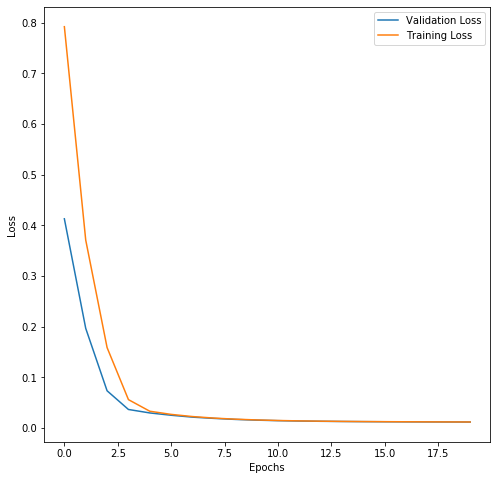

In [96]:
plot_loss(history)

In [97]:
X_random = X.iloc[462165:,:]
y_random = y.iloc[462165:]
preds_on_trained = model.predict(X_random)
preds_on_trained = preds_on_trained.flatten()
print(preds_on_trained)

[0. 0. 0. ... 0. 0. 0.]


In [71]:
import numpy as np
preds = np.array([10,18,16]).flatten()
#preds = (preds - preds.mean()) / preds.std()
#cases = [convert_label_value(y) for y in preds_on_trained]

In [98]:
cases = [convert_label_value(y) for y in preds_on_trained]
y_tested = [convert_label_value(y) for y in y_random]
from scipy.stats import pearsonr
corr, _ = pearsonr(cases, y_tested)
print(corr)

0.998669049584338


In [99]:
print(cases)

[215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 2564.622605411322, 215.81766056031705, 363.3924443306186, 215.81766056031705, 215.81766056031705, 215.81766056031705, 232.1887928066696, 215.81766056031705, 215.81766056031705, 215.81766056031705, 215.81766056031705, 260.7349985129298, 2594.543580050222, 624.1155423588398, 2749.860308342201, 215.81

In [101]:
cases = pd.DataFrame(cases)
cases['actual'] = y_tested
#cases.head(200)
cases.to_csv('predicted.csv')

In [102]:
model.save_weights("model.h5")

In [30]:
X_random = X[X['date'].contains(147)]

AttributeError: 'Series' object has no attribute 'contains'